In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import math

class PyVector :
    'PyVector class'
 
    def __init__(self, x, y) :
        self.x = x
        self.y = y
        
    def __str__(self):
        return 'Vector (%.2f, %.2f)' % (self.x, self.y)
     
    def __repr__(self):
        return 'Vector (%.2f, %.2f)' % (self.x, self.y)   
   
    def __add__(self,other):
        return PyVector(self.x + other.x, self.y + other.y)
    
    def add(self,vec) :
        self.x += vec.x;       
        self.y += vec.y;

    def __sub__(self,other):
        return PyVector(self.x - other.x, self.y - other.y)
    
    def sub(self,vec) :
        self.x -= vec.x;       
        self.y -= vec.y;        
    
    def __mul__(self,number):
        return PyVector(self.x * number, self.y * number)
    
    def mul(self,number) :
        self.x *= number;       
        self.y *= number;        
    
    def __div__(self,number):
        return PyVector(self.x / number, self.y / number)
    
    def div(self,number) :
        self.x /= number;       
        self.y /= number;          
    
    def __truediv__(self,number):
        return PyVector(self.x / number, self.y / number)
    
    def truediv(self,number) :
        self.x /= number;       
        self.y /= number;     
    
    def mag(self):
        return math.sqrt(self.x * self.x + self.y * self.y)
    
    def normalizeit(self) :
        m = self.mag();
        if m > 0 :
            self.div(m)         
    
    def normalizedVector(self) :
        m = self.mag();
        if m > 0 :
            return PyVector(self.x / m , self.y / m)
        return PyVector(0,0)    

    def limit(self,max) :
        if self.mag() > max :
            self.normalizeit()
            self.mul(max)          
  

    


In [2]:
v1 = PyVector(2,10)
v2 = PyVector(5,-2)
print (v1 + v2,v1,v2)

Vector (7.00, 8.00) Vector (2.00, 10.00) Vector (5.00, -2.00)


In [3]:
v1.add(v2)
v1
v2

Vector (5.00, -2.00)

In [4]:
v1 / 3
v1 - v2
v1 * 3
v1.sub(v2)
v1
v1.mul(3)
v1
v1.div(3)
v1

Vector (2.00, 10.00)

In [5]:
v3 = PyVector(3,4)
v3.mag()
v4 = v3.normalizedVector()
v4
v3.normalizeit()
v3
v3.mag()

1.0

In [6]:
import random

class MovableObject :
 
  'MovableObject class '
 
  def __init__(self,x,y,width,height) :
    self.location = PyVector(x,y)
    self.velocity = PyVector(0.1,0.0) 
    self.acceleration = PyVector(0.002,0.00001)
    self.width = width
    self.height = height
    self.maxspeed = 5
 
  def update(self) :
    self.velocity.add(self.acceleration) 
    self.velocity.limit(self.maxspeed)
    self.location.add(self.velocity)
    self.checkBoundary()
 
  def checkBoundary(self) :
    if self.location.x > self.width :
        self.location.x = 0
    elif self.location.x < 0 :
        self.location.x = self.width    
 
    if self.location.y > self.height :
        self.location.y = 0
    elif self.location.y < 0 :
        self.location.y = self.height
    
  


In [7]:
%matplotlib inline

<IPython.core.display.Javascript object>


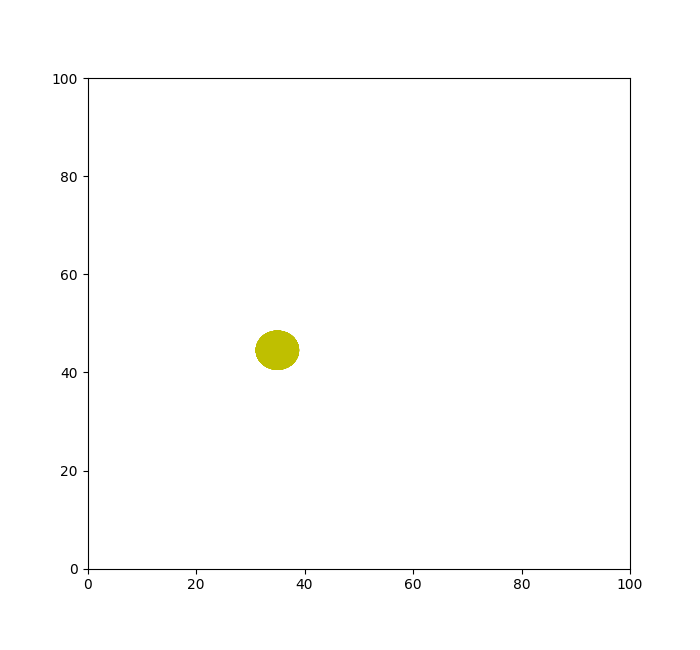

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


%matplotlib notebook
%matplotlib notebook

fig = plt.figure()

fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

startx = 50
starty = 50
width = 100
height = 100

ax = plt.axes(xlim=(0, width), ylim=(0, height))
patch = plt.Circle((startx, starty), 4, fc='y')

animal = MovableObject(startx , starty , width, height)

def init():
    patch.center = (startx, starty)
    ax.add_patch(patch)
    return patch,

def animate(i):    
    
    animal.update()
    
    patch.center = (animal.location.x, animal.location.y)
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)

plt.show()
